# Expectation Maximization 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [315]:
X = pd.read_csv("2d-em.csv", header=None).as_matrix()

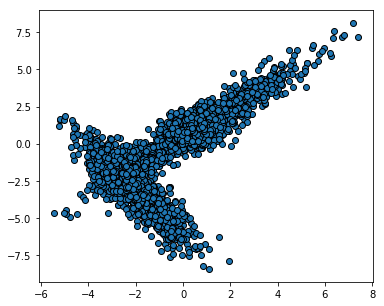

In [132]:
x, y = zip(*X)
plt.figure(figsize=(6, 5))
plt.scatter(x, y, edgecolors="black")

In [152]:
from numpy import pi, sin, cos

def oval(cov, numpoints=100,radius=1):
    arcs = np.linspace(0, 2 * pi, num_points)
    x = radius * sin(arcs)
    y = radius * cos(arcs)
    
    xy = np.array(list(zip(x, y)))
    x, y = zip(*xy.dot(cov))
    return x,y

def make_plot(a):
    plt.figure(figsize=(6, 5))
    plt.title("EM iteration {}".format(a.it))

    colors = ['g', 'r', 'c', 'm', 'y', 'b' ]
    
    # selcect elements based on expectation
    x, y = zip(*X)
    try:
        plt.scatter(x, y, edgecolors="black",c=a.responsibilities[0],cmap='RdYlGn')
    except AttributeError:
        plt.scatter(x, y, edgecolors="black",color='y')
    for i in range(a.cluster_centers.shape[0]):
        # plot centers
        plt.scatter(a.cluster_centers[i,0],a.cluster_centers[i,1],s=250,color=colors[i],edgecolors="white")

        # plot ovals that show the shape of the  variances
        x, y = oval(a.cluster_covs[i],radius=2)
        x += a.cluster_centers[i,0]
        y += a.cluster_centers[i,1]
        plt.plot(x, y,linewidth=5,color=colors[i])

In [353]:
from numpy.linalg import pinv
from scipy.stats import multivariate_normal
import time

class EM:
    def __init__(self,X,clusters=2,init_cov_size=120):
        self.X = X
        self.clusters = clusters
        datapoints = self.X.shape[0]
        dims = self.X.shape[1]
        self.it = 0
        self.init_cov_size = init_cov_size
        
        # initialize with random points and identitiy matrices
        self.cluster_centers = np.random.uniform(low=self.X.min(axis=0),
                                                 high=self.X.max(axis=0),
                                                 size=(self.clusters,self.X.shape[1]))
        
        # using random points from the data for init seems to result in fewer singulartities
        # rand = np.random.choice(datapoints, cluster_quantitiy,replace=False)
        # self.cluster_centers = self.X[rand,:]
        
        self.cluster_covs = np.stack([np.eye(dims)*self.init_cov_size]*self.clusters,axis=0)
        self.mixing_coeffs = np.full(self.clusters,1/self.clusters)
        
    def fit(self,iterations=10):
        for i in range(iterations):  
            # Expectation
            self.responsibilities = self._expectation(self.X)
            # Maximization
            self._maximization()
            self.it += 1
        return self.cluster_centers, self.cluster_covs
    
    def _expectation(self,X):
        tripel = zip(self.cluster_centers,self.cluster_covs,self.mixing_coeffs)
        responsibilities = np.zeros((self.clusters,X.shape[0]))
        divisor_sum = np.zeros((X.shape[0]))
        
        for i,(mean,cov,mixing_coeff) in enumerate(tripel):
            resp = mixing_coeff * multivariate_normal.pdf(X,mean,cov,allow_singular=True)
            responsibilities[i] = resp
            divisor_sum += resp
        responsibilities /= divisor_sum
        return responsibilities

    
    def _maximization(self):
        X = self.X
        for i,resp in enumerate(self.responsibilities):
            Nk = resp.sum()
            if Nk <= 1:
                # catch near singularities
                print("Singularity detected")
                
                # choosing random points form X as mean
                # rand = np.random.choice(datapoints, cluster_quantitiy,replace=False)
                # new_mean = X[rand,:]
                
                # choosing uniformly random
                new_mean = np.random.uniform(low=self.X.min(axis=0),
                                             high=self.X.max(axis=0))
                new_cov = np.eye(self.X.shape[1]) * self.init_cov_size
            else:
                new_mean = 1/Nk * (resp[:,np.newaxis]*X).sum(axis=0)
                unweighted_product = np.einsum('ji,jk->jik', (X-new_mean), (X-new_mean))
                cov_sum = (resp[:,np.newaxis,np.newaxis]*unweighted_product).sum(axis=0)
                new_cov = 1/Nk * cov_sum
            new_mixing_coeff = Nk/X.shape[0]
            
            self.cluster_centers[i] = new_mean
            self.cluster_covs[i] = new_cov
            self.mixing_coeffs[i] = new_mixing_coeff
                
    def predict(self,X):
        resp = self._expectation(X)
        cluster_prediction = resp.argmax(axis=0)
        prediction = np.copy(X)
        for i,mean in enumerate(self.cluster_centers):
            prediction[cluster_prediction==i] = mean
        return prediction
           

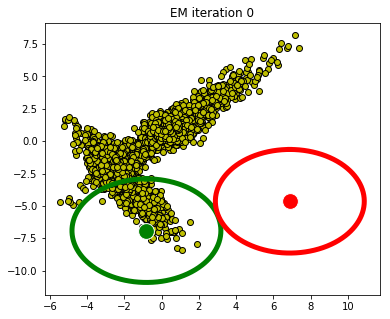

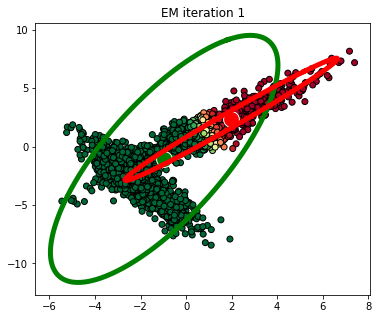

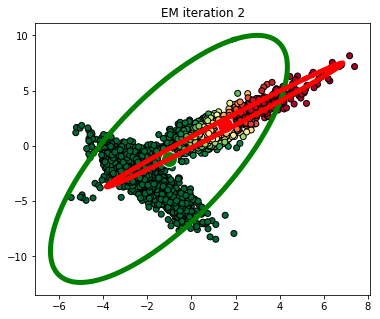

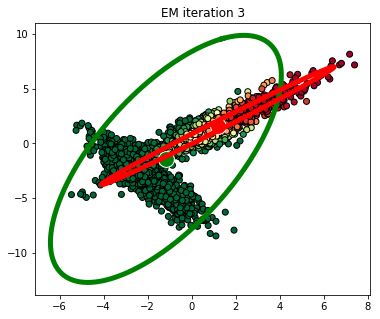

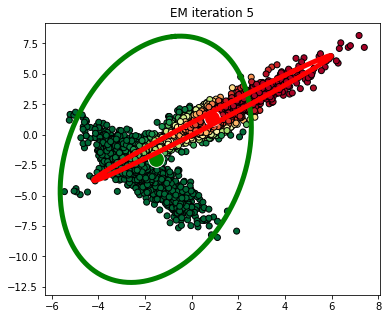

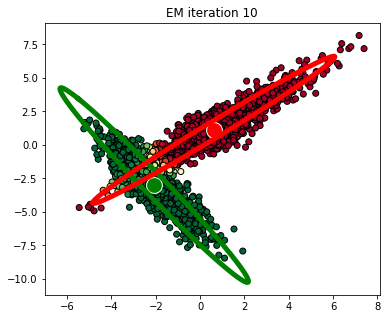

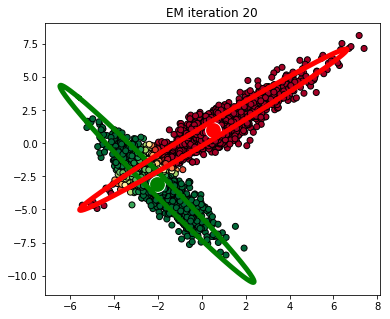

In [338]:
a = EM(X,2,init_cov_size=2)
for i in [1,1,1,2,5,10,10]:
    make_plot(a)
    mm = a.fit(i)

# Example: image compression

In [163]:
import matplotlib.image as mpimg

def show_img(img):
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.show()

In [247]:
path = '/Users/valentinwolf/Desktop/Bild2.jpg'
img = mpimg.imread(path)
show_img(img.astype('uint8'))

In [358]:
rows = img.shape[0]
cols = img.shape[1]

flat_img = img.reshape(img.shape[0] * img.shape[1], 3).astype(np.float)
cmpr = EM(flat_img,64,init_cov_size=30)

In [359]:
a = cmpr.fit(20)

Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity detected
Singularity d

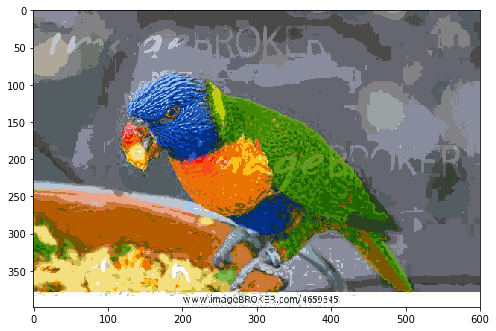

In [360]:
cmpr_img = (cmpr.predict(flat_img)).astype('uint8').reshape(rows,cols, 3)
show_img(cmpr_img)